In [ ]:
!unzip archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
!ls


archive.zip  sample_data  test	train


In [ ]:
train_folder = 'fer2013/train'
test_folder = 'fer2013/test'


In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()  # select your dataset zip file here

# Check uploaded file name
for fn in uploaded.keys():
    print('Uploaded file:', fn)
    zip_file = fn

# Unzip the dataset
!unzip -q {zip_file}  # -q for quiet output


Saving archive.zip to archive (1).zip
Uploaded file: archive (1).zip
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip -q archive (1).zip  # -q for quiet output'


In [ ]:
!ls  # lists all files and folders


'archive (1).zip'   archive.zip   sample_data   test   train


In [ ]:
train_folder = 'train'
test_folder = 'test'

In [ ]:
!pip install tensorflow keras opencv-python matplotlib numpy


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 106s 116ms/step - accuracy: 0.2403 - loss: 1.8243 - val_accuracy: 0.2766 - val_loss: 1.7385
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:09 77ms/step - accuracy: 0.2500 - loss: 1.7175

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2500 - loss: 1.7175 - val_accuracy: 0.2764 - val_loss: 1.7375
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 102s 114ms/step - accuracy: 0.2688 - loss: 1.7671 - val_accuracy: 0.3107 - val_loss: 1.7168
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3125 - loss: 1.7869 - val_accuracy: 0.3103 - val_loss: 1.7152
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 136s 115ms/step - accuracy: 0.2846 - loss: 1.7357 - val_accuracy: 0.3489 - val_loss: 1.6409
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3438 - loss: 1.6029 - val_accuracy: 0.3447 - val_loss: 1.6483
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 135s 115ms/step - accuracy: 0.3171 - loss: 1.6791 - val_accuracy: 0.4230 - val_loss: 1.4945
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1875 - loss: 1.6698 - val_accuracy: 0.4245 - val_loss: 1.4952
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 143s 123ms/step - accuracy: 0.3632 - loss: 1.6026 - val_accurac

In [ ]:
import zipfile

# Use the uploaded zip file's name
zip_path = zip_file  # Corrected to use the variable holding the uploaded file name
extract_path = './dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")

Extraction completed!


In [ ]:
!ls ./dataset


test  train


In [ ]:
!ls ./dataset/train


angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:
!pip install tensorflow keras opencv-python matplotlib numpy


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
train_folder = './dataset/train'
test_folder = './dataset/test'


In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,271 (11.12 MB)

 Trainable params: 2,915,271 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,  # increase if needed
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)


Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 674s 751ms/step - accuracy: 0.3194 - loss: 1.6828 - val_accuracy: 0.4142 - val_loss: 1.5137
Epoch 2/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.4375 - loss: 1.4926 - val_accuracy: 0.4117 - val_loss: 1.5146
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 681s 759ms/step - accuracy: 0.3680 - loss: 1.6107 - val_accuracy: 0.4424 - val_loss: 1.4560
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.3438 - loss: 1.5772 - val_accuracy: 0.4382 - val_loss: 1.4628
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 609s 679ms/step - accuracy: 0.3955 - loss: 1.5559 - val_accuracy: 0.4820 - val_loss: 1.3687
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5625 - loss: 1.3233 - val_accuracy: 0.4771 - val_loss: 1.3782
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 613s 683ms/step - accuracy: 0.4200 - loss: 1.4957 - val_accuracy: 0.4881 - val_loss: 1.3373
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.5625 - loss: 1

In [ ]:
model.save('emotion_model.h5')


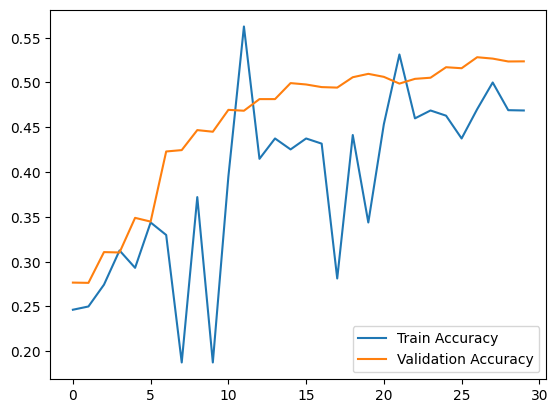

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_emotion(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotions = list(train_generator.class_indices.keys())
    print("Predicted Emotion:", emotions[np.argmax(prediction)])

# Example usage:
predict_emotion('/content/boy-happy-face-isolated-transparent-background_220739-23582.avif')  # replace with your image path


In [ ]:
def predict_emotion(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotions = list(train_generator.class_indices.keys())
    print("Predicted Emotion:", emotions[np.argmax(prediction)])

# Example usage:
predict_emotion('/content/a-muscular-man-in-a-sleeveless-shirt-displays-an-intense-angry-expression-with-eyes-wide-open-and-gritted-teeth-his-face-is-prominently-focused-in-a-close-up-shot-capturing-raw-emotion-photo.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Emotion: angry
